$Import-Libraries$

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import string

$Import-Data$

In [38]:
#The usecols parameter helps in efficiently loading only the specified columns, saving memory and speeding up the data loading process 
data= pd.read_csv("C:\\Users\\SHEIKH RAAZ\\Downloads\\spam.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


$Data-Cleaning$

In [48]:
data.sample(5)


,v1,v2
4236,ham,Life style garments account no please.
4923,ham,We can go 4 e normal pilates after our intro...
4068,ham,Hope youåÕre not having too much fun without m...
3413,ham,No pic. Please re-send.
70,ham,Wah lucky man... Then can save money... Hee...


In [51]:
# Renaming the columns using dictionary

data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [52]:
data.sample(5)

,target,text
4858,ham,"Hey, a guy I know is breathing down my neck to..."
2104,ham,Anyway seriously hit me up when you're back be...
4516,ham,"Men always needs a beautiful, intelligent, car..."
1989,ham,The basket's gettin full so I might be by tonight
5552,ham,Have a safe trip to Nigeria. Wish you happines...


In [53]:
# lAbelling ham and spam field in target column as numbers using label encoder. ham-->0 and spam--->1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [54]:
data['target']=encoder.fit_transform(data['target'])

In [55]:
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
# checking missing values
df.isnull().sum()

kind       0
Message    0
dtype: int64

In [57]:
# check for duplicate values
df.duplicated().sum()

403

In [58]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [59]:
df.duplicated().sum()  #shows no duplicate value now

0

In [60]:
df.shape

(5169, 2)

$EDA$

In [61]:
data['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

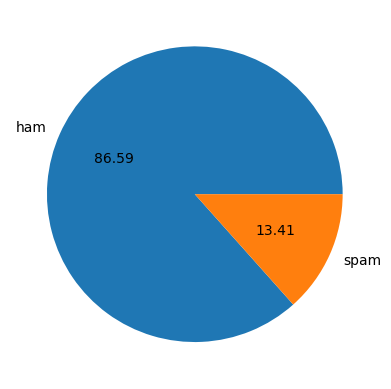

In [63]:
#viewing the target to know if balanced or not
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()    #this is used to that extra piece of code wont come when only upper code is run

In [64]:
# We can clearly see that data is imbalanced
# For deeper analysis, we will try to find out the number of characters, words and sentences in the sms.
#So, we will make 3 columns using NLP library nltk.

import nltk

In [65]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\SHEIKH
[nltk_data]     RAAZ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\SHEIKH
[nltk_data]     RAAZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords   #for stopwords

In [67]:
from nltk.stem.porter import PorterStemmer     #for stemming and creating stemmer obj ps
ps=PorterStemmer()

In [69]:
# finding number of characters used in text column using pandas
data['num_characters']=data['text'].apply(len)

In [70]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [71]:
# to count number of words, we require nltk 
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [72]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [73]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [74]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [75]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
# "0" indicates that this is for "ham" messages. we are using describe on the below 3 columns of only ham messages to see the
#pattern of those messages
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
# for spam messages
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [78]:
#clearly, we can see that spam messages are a bit longer than ham messages. lets see them by plotting too.
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

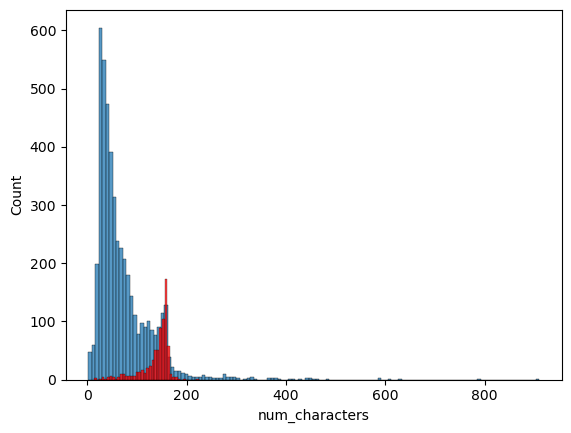

In [80]:
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

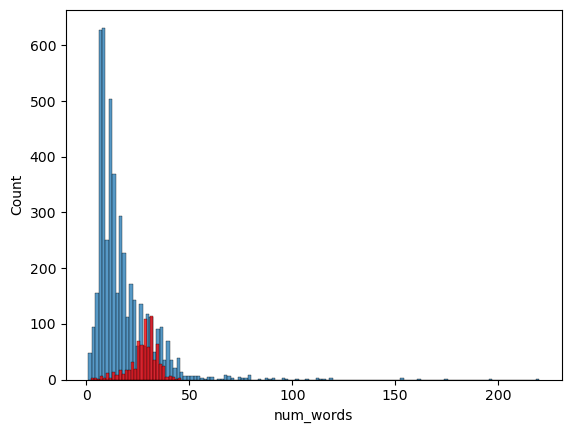

In [81]:
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

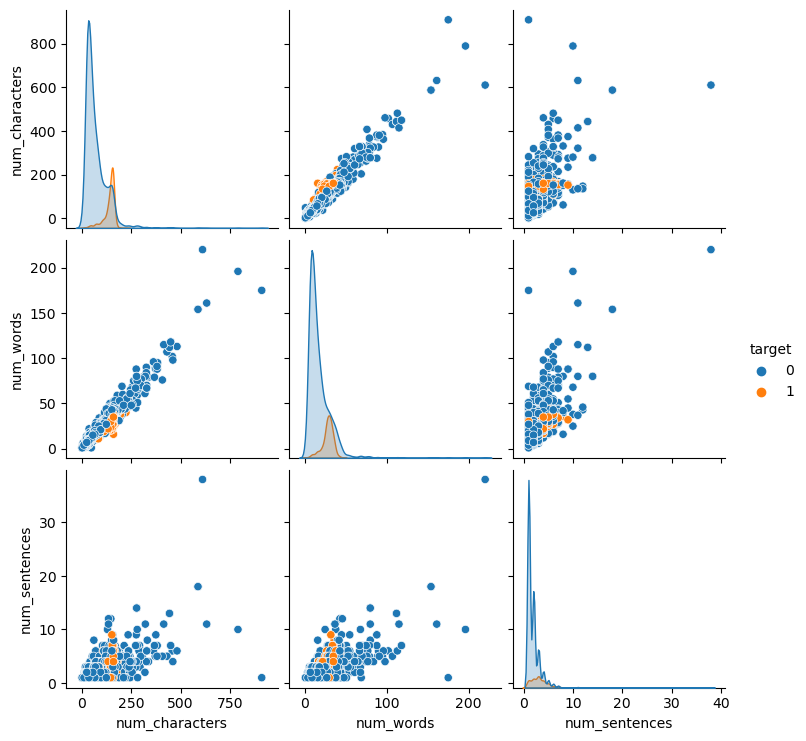

In [82]:
sns.pairplot(data,hue='target')

## Text/Data Preprocessing¶
- Steps 1) Lower case
- 2) Tokenization 
- 3) Removing special characters 
- 4) Removing stop words and punctuation 
- 5) Stemming

In [84]:
def transform_text(text):
    text=text.lower()    #converting the text into lowercase
    text=nltk.word_tokenize(text)    #using nltk for tokenization and gives each word of the text in the form of list
    # As the text is now converted in the form of list,now we will run the loop and then alphanumeric only taken
    y=[]    #initialize empty list
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
            y.append(ps.stem(i))
    
    
    return " ".join(y)
            

In [86]:
transform_text("Hello, this is Shah Saud ")   #fn call

'hello shah saud'

In [87]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [88]:
data['transformed_text']=data['text'].apply(transform_text)

In [89]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [102]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [103]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():   #converted to list
    for word in msg.split():
        spam_corpus.append(word)

In [104]:
len(spam_corpus)

11490

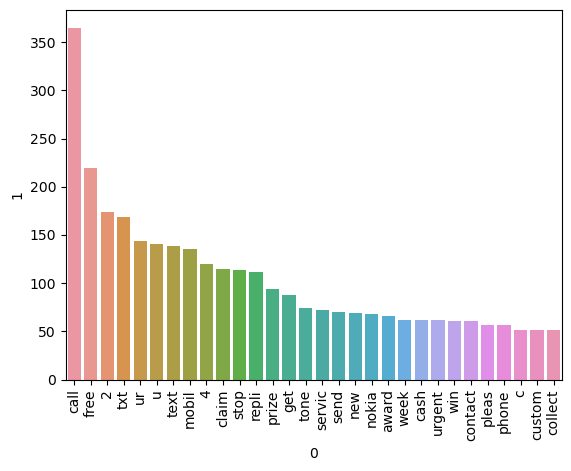

In [105]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])  #creates a dictionary having information of the words that came in corpus and later add into dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():   #converted to list
    for word in msg.split():
        ham_corpus.append(word)

In [108]:
len(ham_corpus)

38221

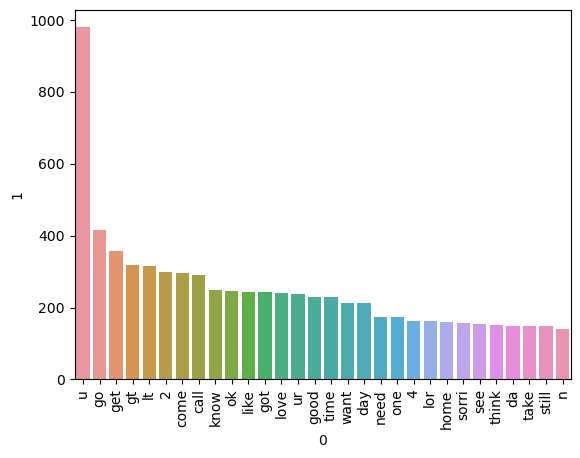

In [109]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])  #creates a dictionary having information of the words that came in corpus and later add into dataframe)
plt.xticks(rotation='vertical')
plt.show()

In [110]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Building the model (Using Naive Bayes)
In textual data, naive bayes algorithm gives the best result so we are using this model. Also, we will see for other algorithms to find the best suiting algorith according to accuracy.\

==> In any algorithm, we give inputs in numbers. Here, out input is transformed_text which is in text. So, we need to convert it in numeric form i.e. we need to vectorize the text.

2 ways for vectorization a) Bag of words--> freq word ko col banauney b) TFIDF c) Word to vec

In [111]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2000)

In [112]:
X=tfidf.fit_transform(data['transformed_text']).toarray()    #gives sparse array

In [113]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [114]:
X.shape

(5572, 2000)

In [115]:
y=data['target'].values

In [116]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [119]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [120]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [121]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8439461883408071
[[812 145]
 [ 29 129]]
0.4708029197080292


In [122]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9704035874439462
[[956   1]
 [ 32 126]]
0.9921259842519685


In [123]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97847533632287
[[955   2]
 [ 22 136]]
0.9855072463768116


#since data is imbalanced, so precision is more important. so we will go with multinomial naive bayes (MNB) using tfidf.
#Also,lets check for other algorithms

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [142]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)


In [143]:
# creating a dictionary having algorithm names as keys and  their objects as values
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    
}

In [144]:
#creating fn "train_classifier" in which we are passing classifier, training and testing data
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

#here, Y_pred has list of predictions for X_test

In [145]:
#calling the function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9704035874439462, 0.9770992366412213)

In [146]:
# now, I am looping over above dictionary clfs, and catch one algorithm at a time, trained the model and store the accuracy and 
#precision score for every algorithm. And, then convert that accuracy and precision for each algorithm into dataframe

accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy- ",current_accuracy)
    print("Precision- ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy-  0.9704035874439462
Precision-  0.9770992366412213
For  KN
Accuracy-  0.9049327354260089
Precision-  1.0
For  NB
Accuracy-  0.9704035874439462
Precision-  0.9921259842519685
For  DT
Accuracy-  0.9228699551569507
Precision-  0.86
For  LR
Accuracy-  0.9560538116591928
Precision-  0.9658119658119658
For  RF
Accuracy-  0.9695067264573991
Precision-  0.984375
For  AdaBoost
Accuracy-  0.957847533632287
Precision-  0.9743589743589743
For  BgC
Accuracy-  0.9632286995515695
Precision-  0.9333333333333333
For  ETC
Accuracy-  0.9739910313901345
Precision-  1.0
For  GBDT
Accuracy-  0.9372197309417041
Precision-  0.9489795918367347


In [147]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904933,1.000000
8,ETC,0.973991,1.000000
2,NB,0.970404,0.992126
5,RF,0.969507,0.984375
0,SVC,0.970404,0.977099
6,AdaBoost,0.957848,0.974359
4,LR,0.956054,0.965812
9,GBDT,0.937220,0.948980
7,BgC,0.963229,0.933333
3,DT,0.922870,0.860000


In [ ]:
#lets try to improve our model so that accuracy is also improved
#TO DO:
#    1) tfidf vectorizer import garda hidden parameter huncha max_features vanni tesma add garni import garda
#     2) Scale garna sakinxa data lai (khasai improve vayena so not merged)
#     3) Voting classifier (best performing algorithm haru bata ni best nikalne)

In [148]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_maxft_2000':accuracy_scores,'Precision_maxft_2000':precision_scores}).sort_values('Precision_maxft_2000',ascending=False)

In [149]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [150]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_maxft_2000,Precision_maxft_2000
0,KN,0.904933,1.000000,0.904933,1.000000
1,ETC,0.973991,1.000000,0.973991,1.000000
2,NB,0.970404,0.992126,0.970404,0.992126
3,RF,0.969507,0.984375,0.969507,0.984375
4,SVC,0.970404,0.977099,0.970404,0.977099
5,AdaBoost,0.957848,0.974359,0.957848,0.974359
6,LR,0.956054,0.965812,0.956054,0.965812
7,GBDT,0.937220,0.948980,0.937220,0.948980
8,BgC,0.963229,0.933333,0.963229,0.933333
9,DT,0.922870,0.860000,0.922870,0.860000


In [151]:
#voting classifier
mnb=MultinomialNB()
svc= SVC(kernel='sigmoid',gamma=1.0,probability=True)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [152]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [154]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [155]:
y_pred=voting.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9775784753363229
Precision: 1.0


In [156]:
#after voting classifier, our precision has declined further. so of no use
# lets do stacking now in which weightage of algorithm can be given
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [157]:
from sklearn.ensemble import StackingClassifier

In [158]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [159]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9757847533632287
Precision: 0.9712230215827338


In [160]:
# we can see that the best performing algorithm so far is multinomial naive bayes. So, we will use it.

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))